In [22]:
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from joblib import dump

In [23]:
def predict(model, timeseries, window):
    X_test = timeseries[-window:]
    y_test = model.predict([X_test])

    return y_test[0]

In [24]:
# Sample from a sinusoidal
def generate_data(max_datapoint):
    start_time = 0
    end_time = 100
    sample_rate = 10
    time = np.arange(start_time, end_time, 1/sample_rate)

    theta = 0
    frequency = 30
    amplitude = 1e12
    data = amplitude * np.sin(2 * np.pi * frequency * time + theta)
    data = data - min(data)
    data = data / max(data) * max_datapoint
    data = [math.floor(point) for point in data]

    return data

**Metric: Number of sessions**

1000 datapoints


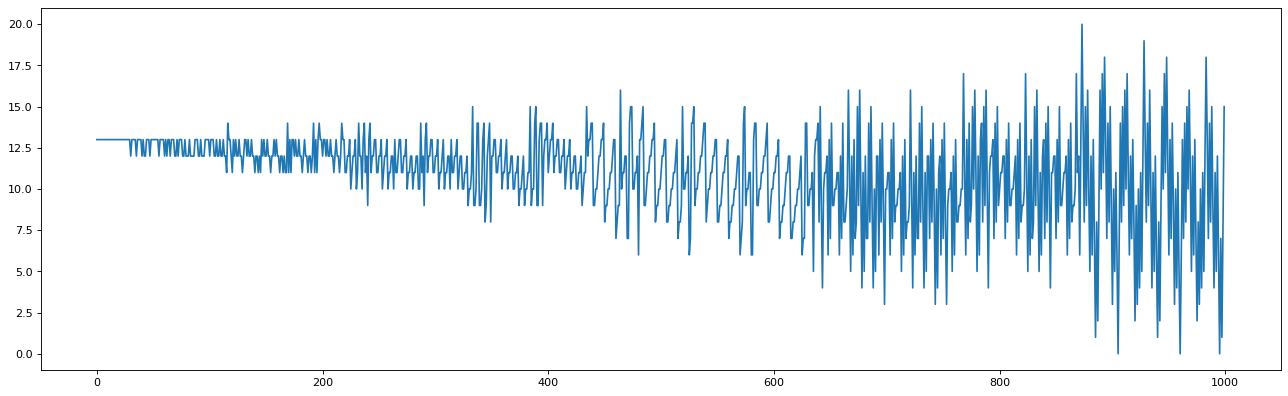

In [25]:
data = generate_data(20)

print(f'{len(data)} datapoints')
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(data)

In [26]:
window = 10
horizon = 5

test_data_percentage = 0.1
test_datapoints = int(round(len(data) * test_data_percentage))

data_train = data[:-test_datapoints]
data_test = data[-test_datapoints:]

X_train = [data_train[i-window:i] for i in range(window, len(data_train) - horizon)]
y_train = [data_train[i:i+horizon] for i in range(window, len(data_train) - horizon)]
X_test = [data_test[i-window:i] for i in range(window, len(data_test) - horizon)]
y_test = [data_test[i:i+horizon] for i in range(window, len(data_test) - horizon)]

In [27]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

print(f'{mean_squared_error(model.predict(X_train), y_train) / np.mean(data)} training MSE')
print(f'{mean_squared_error(model.predict(X_test), y_test) / np.mean(data)} test MSE')

0.0398220776175775 training MSE
1.8106930258580676 test MSE


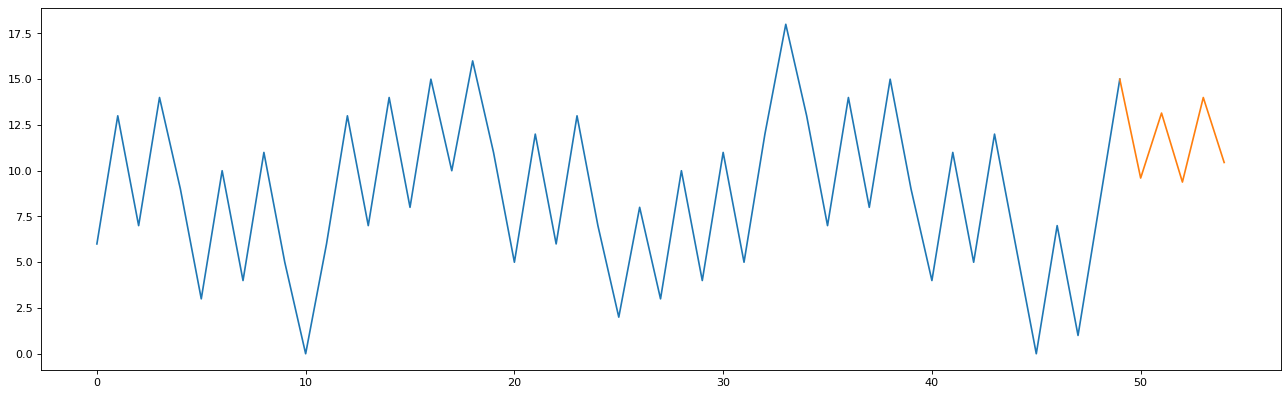

In [28]:
prediction = predict(model, data, window)
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(data[-window * 5:])
plt.plot(list(range(window * 5 - 1, window * 5 + horizon)), [data[-1]] + prediction.tolist())

In [29]:
dump(model, 'sessions_predictor.joblib')

['sessions_predictor.joblib']

**Metric: number of cameras**

1000 datapoints


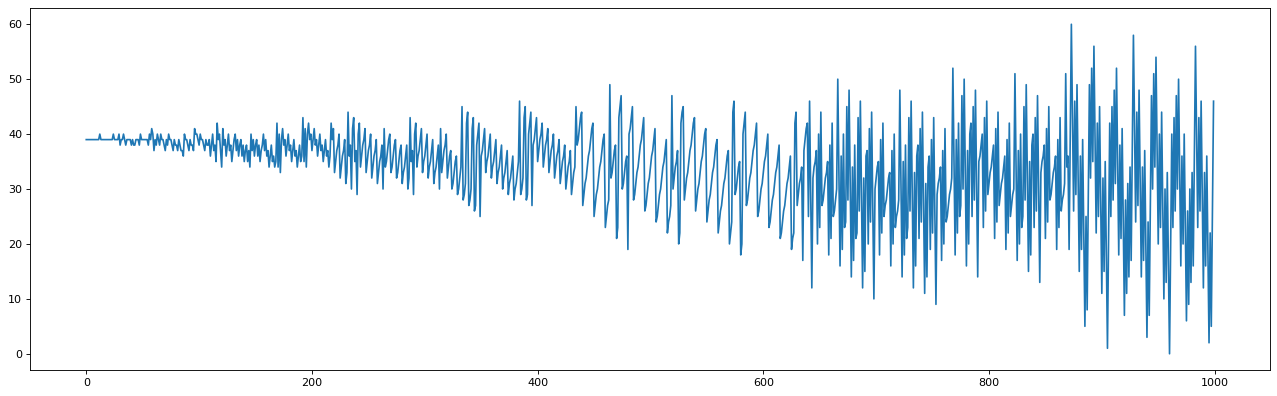

In [30]:
data = generate_data(60)

print(f'{len(data)} datapoints')
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(data)

In [31]:
window = 10
horizon = 5

test_data_percentage = 0.1
test_datapoints = int(round(len(data) * test_data_percentage))

data_train = data[:-test_datapoints]
data_test = data[-test_datapoints:]

X_train = [data_train[i-window:i] for i in range(window, len(data_train) - horizon)]
y_train = [data_train[i:i+horizon] for i in range(window, len(data_train) - horizon)]
X_test = [data_test[i-window:i] for i in range(window, len(data_test) - horizon)]
y_test = [data_test[i:i+horizon] for i in range(window, len(data_test) - horizon)]

In [32]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

print(f'{mean_squared_error(model.predict(X_train), y_train) / np.mean(data)} training MSE')
print(f'{mean_squared_error(model.predict(X_test), y_test) / np.mean(data)} test MSE')

0.09286301609276416 training MSE
5.1168270836424785 test MSE


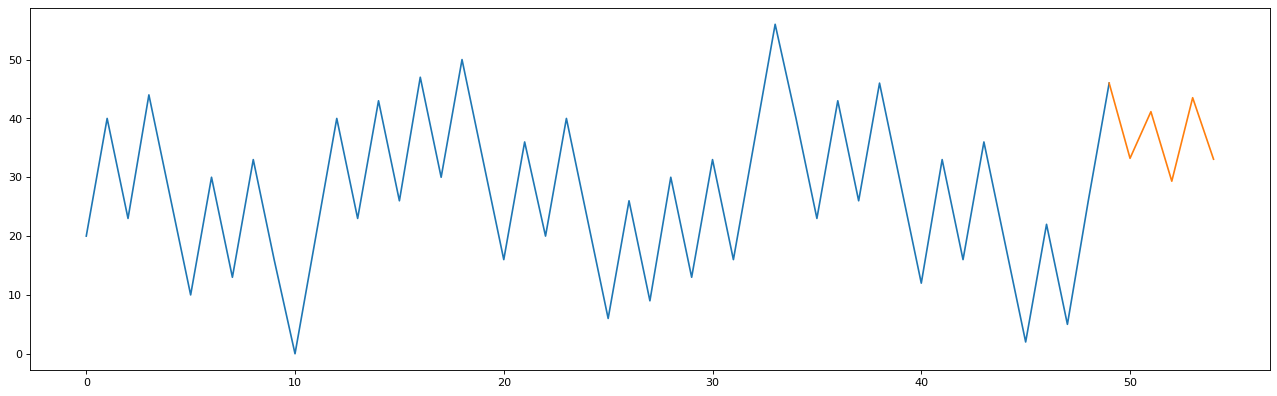

In [33]:
prediction = predict(model, data, window)
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(data[-window * 5:])
plt.plot(list(range(window * 5 - 1, window * 5 + horizon)), [data[-1]] + prediction.tolist())

In [34]:
dump(model, 'cameras_predictor.joblib')

['cameras_predictor.joblib']

**Metric: number of received frames**

1000 datapoints


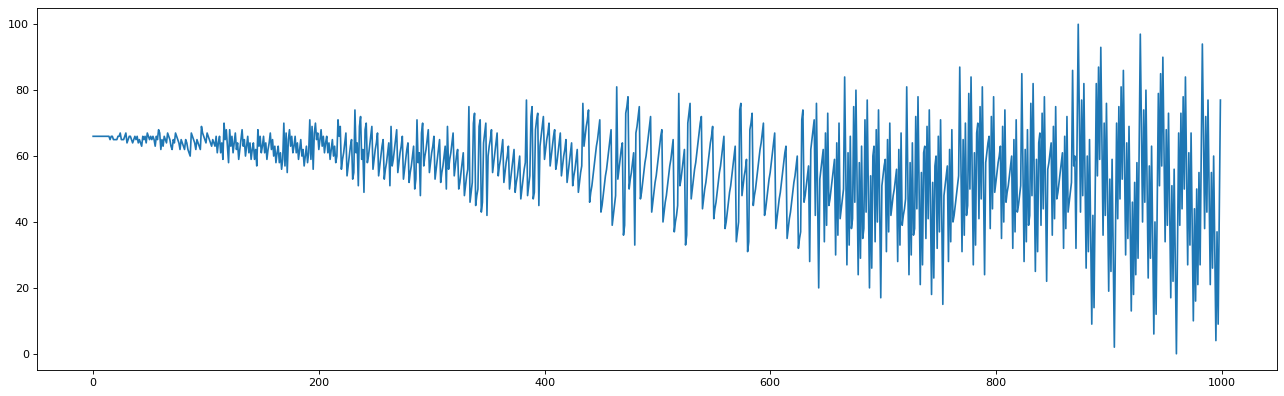

In [35]:
data = generate_data(100)

print(f'{len(data)} datapoints')
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(data)

In [36]:
window = 10
horizon = 5

test_data_percentage = 0.1
test_datapoints = int(round(len(data) * test_data_percentage))

data_train = data[:-test_datapoints]
data_test = data[-test_datapoints:]

X_train = [data_train[i-window:i] for i in range(window, len(data_train) - horizon)]
y_train = [data_train[i:i+horizon] for i in range(window, len(data_train) - horizon)]
X_test = [data_test[i-window:i] for i in range(window, len(data_test) - horizon)]
y_test = [data_test[i:i+horizon] for i in range(window, len(data_test) - horizon)]

In [37]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

print(f'{mean_squared_error(model.predict(X_train), y_train) / np.mean(data)} training MSE')
print(f'{mean_squared_error(model.predict(X_test), y_test) / np.mean(data)} test MSE')

0.15288292914597973 training MSE
8.77409700376723 test MSE


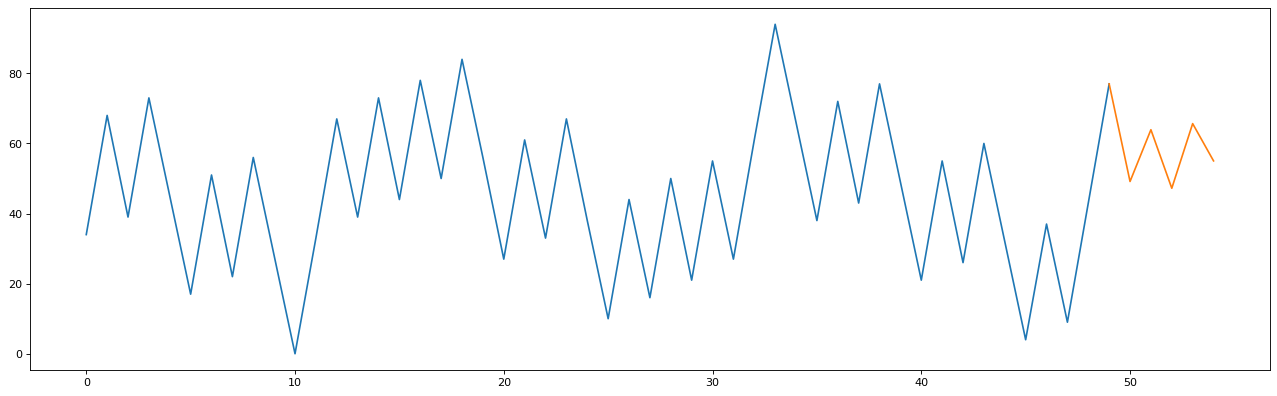

In [38]:
prediction = predict(model, data, window)
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(data[-window * 5:])
plt.plot(list(range(window * 5 - 1, window * 5 + horizon)), [data[-1]] + prediction.tolist())

In [39]:
dump(model, 'frames_predictor.joblib')

['frames_predictor.joblib']